# Shapley Analysis for Regression of Concrete Dataset 

SHAP(SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions (see [papers](https://github.com/slundberg/shap#citations) for details).

#### Install
Shap can be installed from either PyPI or conda-forge:

`pip install shap`
or
`conda install -c conda-forge shap`

#### Github 
https://github.com/slundberg/shap

### Import packages and load the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap #

np.random.seed(0)
pd.options.display.max_rows = 10

In [2]:
df = pd.read_excel('./data/Concrete_Data.xls', sheet_name='Sheet1')
df.columns = ['Cement (kg/m^3)',
       'Blast Furnace Slag (kg/m^3 )',
       'Fly Ash (kg/m^3)',
       'Water (kg/m^3)',
       'Superplasticizer (kg/m^3)',
       'CoarseAggregate (kg/m^3)',
       'FineAggregate (kg/m^3)', 
       'Age (day)',
       'ComprStrength (MPa)']
df

,Cement (kg/m^3),Blast Furnace Slag (kg/m^3 ),Fly Ash (kg/m^3),Water (kg/m^3),Superplasticizer (kg/m^3),CoarseAggregate (kg/m^3),FineAggregate (kg/m^3),Age (day),ComprStrength (MPa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1024,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1025,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1026,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1027,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### Train-test split

In [107]:
from sklearn.model_selection import train_test_split

X, y = df[df.columns[:-1]].values, df[df.columns[-1]].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

In [108]:
from sklearn.preprocessing import MinMaxScaler
# Scale inputs
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

### Train a regressor


In [8]:
from sklearn.metrics import mean_squared_error
def plot_predictions(y, y_hat, labels):
 
  
    plt.rcParams.update({'font.size': 18, 'font.sans-serif':'arial'})
    y, y_hat, labels = list(
        map(
            lambda l: l if isinstance(l, list) else [l],
            [y, y_hat, labels]))
    color_list = ['blue', 'red']
    n_plots = len(y)
    y_min = min([min(z) for z in y])
    y_max = max([max(z) for z in y])
    lims = (y_min, y_max)
    fig, ax = plt.subplots(
        1, n_plots, figsize=(6*n_plots, 5),
        squeeze=False, sharex=True, sharey=True)
    for axis, target, prediction, label, color in zip(ax[0, :], y, y_hat, labels, color_list):
        # Scatter plot
        axis.scatter(target, prediction, alpha=0.3, c = color)

        # Title and labels
        rmse_value = np.sqrt(mean_squared_error(target, prediction))
        title = label + " (RMSE=%.3f)" % rmse_value
        axis.set_title(title)
        axis.set_xlabel('Target Compressive Strength (MPa)')
        axis.set_ylabel('Predicted Compressive Strength (MPa)')
        axis.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
        axis.yaxis.set_tick_params(which='both', labelleft=True)

    plt.subplots_adjust(wspace = 0.3)
    plt.show()


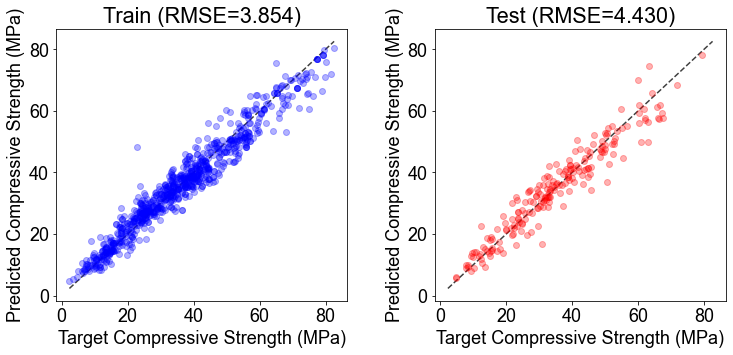

In [110]:
from sklearn.ensemble import GradientBoostingRegressor

regressor = GradientBoostingRegressor()
regressor.fit(X_train_scaled, y_train)

y_hat_train = regressor.predict(X_train_scaled)
y_hat_test = regressor.predict(X_test_scaled)
y_hat = regressor.predict(X_scaled)

plot_predictions([y_train, y_test], [y_hat_train, y_hat_test],    labels=['Train', 'Test'])

In [52]:
X_df = df.iloc[:,:-1]

## Peek into the "black box" - SHAP analysis for Tree-based Model

In [53]:
shap_explainer = shap.TreeExplainer(regressor)
shap_values = shap_explainer.shap_values(X_scaled)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


### SHAP values for feature importance

Importance Note: SHAP values try to explain what the trained model thinks, not what the data shows. So, a better regression model provides a better understanding of the reality.

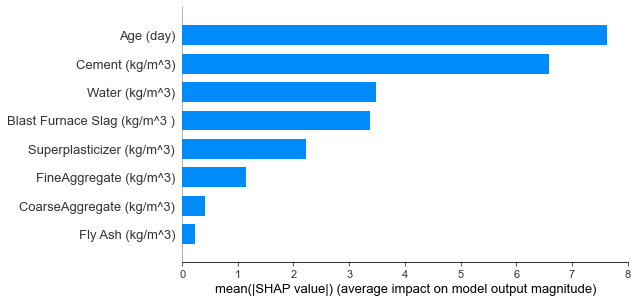

In [55]:
shap.summary_plot(shap_values, X_df, plot_type = 'bar')

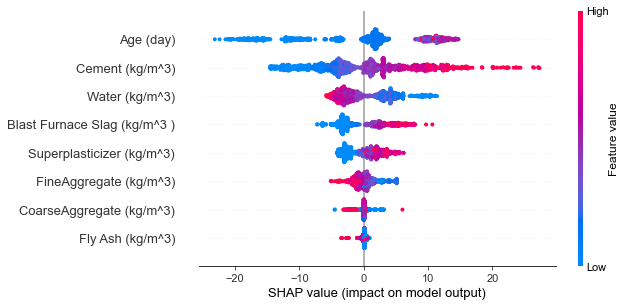

In [54]:
shap.summary_plot(shap_values, X_df)

### The SHAP values for individual data point

Compressive Strength (Prediction): 24.27
Compressive Strength (Ground Truth): 23.8


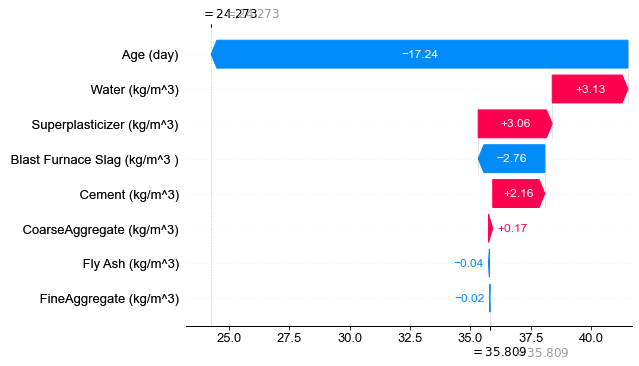

In [56]:
ind = 333
print('Compressive Strength (Prediction):', np.round(y_hat[ind],2)) 
print('Compressive Strength (Ground Truth):', np.round(y[ind],2)) 
shap.initjs()
shap.waterfall_plot(shap_explainer.expected_value[0],shap_values[ind], X_df.iloc[ind], max_display =20, show=True)
shap.force_plot(shap_explainer.expected_value,shap_values[ind], X_df.iloc[ind])


Compressive Strength (Prediction): 81.24
Compressive Strength (Ground Truth): 82.6


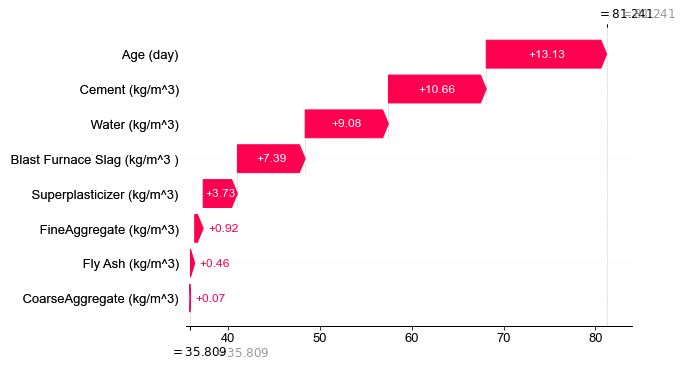

In [59]:
ind = np.argmax(y_hat)
print('Compressive Strength (Prediction):', np.round(y_hat[ind],2)) 
print('Compressive Strength (Ground Truth):', np.round(y[ind],2)) 
shap.initjs()
shap.waterfall_plot(shap_explainer.expected_value[0],shap_values[ind], X_df.iloc[ind], max_display =20, show=True)
shap.force_plot(shap_explainer.expected_value,shap_values[ind], X_df.iloc[ind])


### SHAP values in partial dependence plots

Cement (kg/m^3)


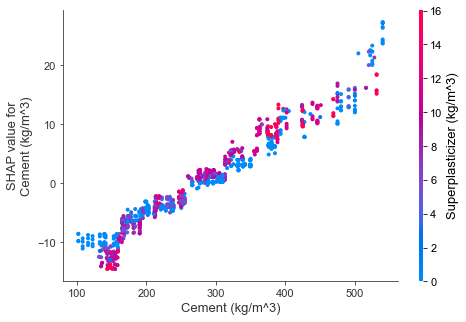

Blast Furnace Slag (kg/m^3 )


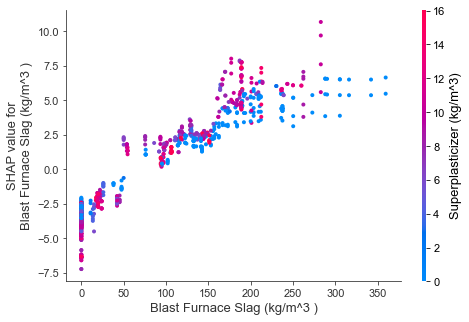

Fly Ash (kg/m^3)


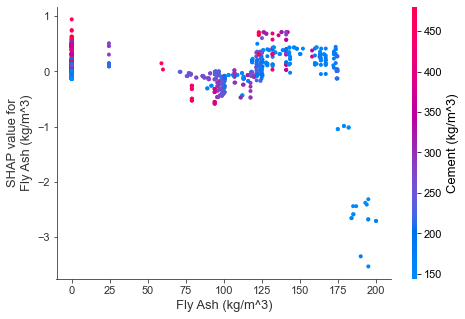

Water (kg/m^3)


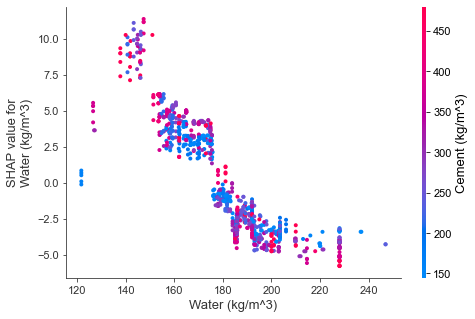

Superplasticizer (kg/m^3)


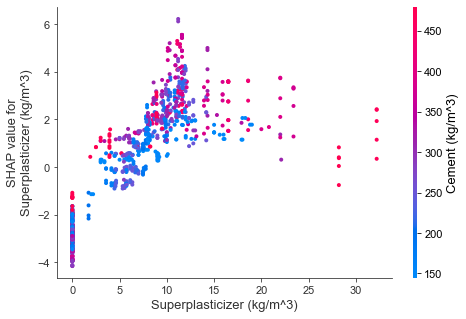

CoarseAggregate (kg/m^3)


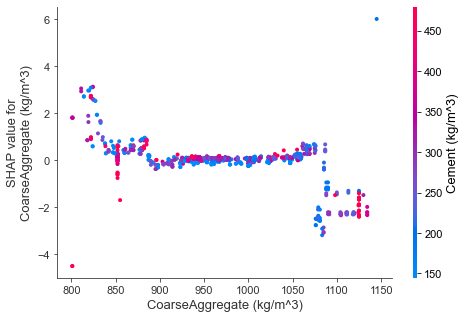

FineAggregate (kg/m^3)


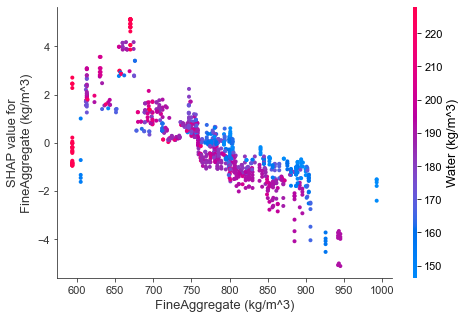

Age (day)


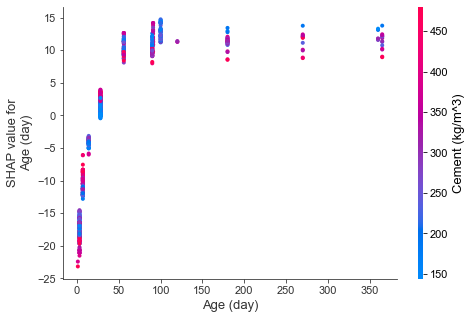

In [58]:
for i in range(len(X_df.columns)):
    print(X_df.columns[i])
    shap.dependence_plot(i, shap_values, X_df.values, feature_names=X_df.columns)

#### Switch the interaction variable (the one shown by the color)

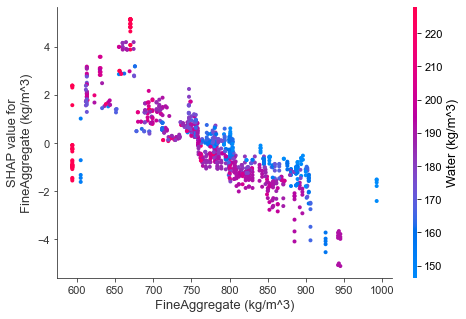

In [49]:
shap.dependence_plot(6, shap_values, X_df.values, feature_names=X_df.columns, interaction_index=3)

## Retrain the model with a subset of the data

In [3]:
df_sorted = df.sort_values(by = df.columns[0])
df_sorted.iloc[:100]

,Cement (kg/m^3),Blast Furnace Slag (kg/m^3 ),Fly Ash (kg/m^3),Water (kg/m^3),Superplasticizer (kg/m^3),CoarseAggregate (kg/m^3),FineAggregate (kg/m^3),Age (day),ComprStrength (MPa)
651,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3,4.565021
652,102.0,153.0,0.0,192.0,0.0,887.0,942.0,90,25.460970
676,102.0,153.0,0.0,192.0,0.0,887.0,942.0,7,7.675936
679,102.0,153.0,0.0,192.0,0.0,887.0,942.0,28,17.275511
656,108.3,162.4,0.0,203.5,0.0,938.2,849.0,28,20.593959
...,...,...,...,...,...,...,...,...,...
713,153.0,102.0,0.0,192.0,0.0,888.0,943.1,7,8.374375
880,153.0,145.0,113.0,178.0,8.0,1002.0,689.0,28,25.558875
887,153.0,145.0,0.0,178.0,8.0,1000.0,822.0,28,19.008853
838,153.0,239.0,0.0,200.0,6.0,1002.0,684.0,28,26.855090


In [5]:
### Train-test split

from sklearn.model_selection import train_test_split
X, y = df_sorted[df.columns[:-1]].values, df_sorted[df.columns[-1]].values
X_smalldata = X[:100]
y_smalldata = y[:100]
X_train_smalldata, X_test_smalldata, y_train_smalldata, y_test_smalldata = train_test_split(
    X_smalldata, y_smalldata, test_size=0.2
)

from sklearn.preprocessing import MinMaxScaler
# Scale inputs
scaler = MinMaxScaler()
X_train_scaled_smalldata = scaler.fit_transform(X_train_smalldata)
X_test_scaled_smalldata = scaler.transform(X_test_smalldata)
X_scaled_smalldata = scaler.transform(X_smalldata)

X_df_smalldata = df_sorted[df.columns[:-1]].iloc[:100]

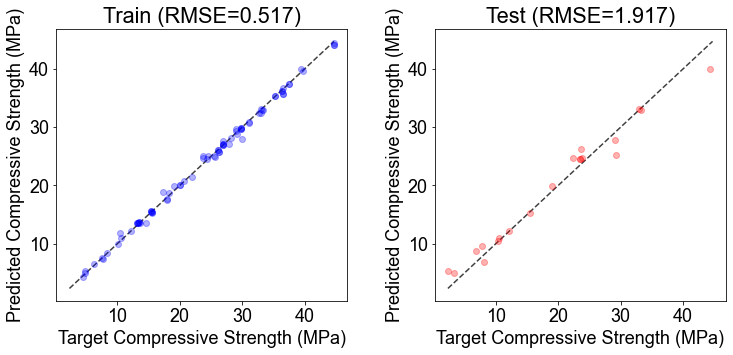

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

regressor_smalldata = GradientBoostingRegressor()
regressor_smalldata.fit(X_train_scaled_smalldata, y_train_smalldata)
y_hat_train_smalldata = regressor_smalldata.predict(X_train_scaled_smalldata)
y_hat_test_smalldata = regressor_smalldata.predict(X_test_scaled_smalldata)
y_hat_smalldata = regressor_smalldata.predict(X_scaled_smalldata)

plot_predictions([y_train_smalldata, y_test_smalldata], [y_hat_train_smalldata, y_hat_test_smalldata],    labels=['Train', 'Test'])

In [12]:
shap_explainer_smalldata = shap.TreeExplainer(regressor_smalldata)
shap_values_smalldata = shap_explainer_smalldata.shap_values(X_scaled_smalldata)


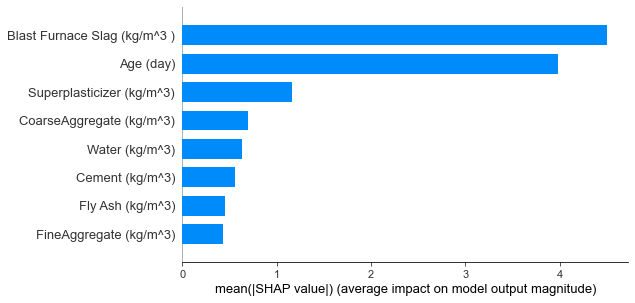

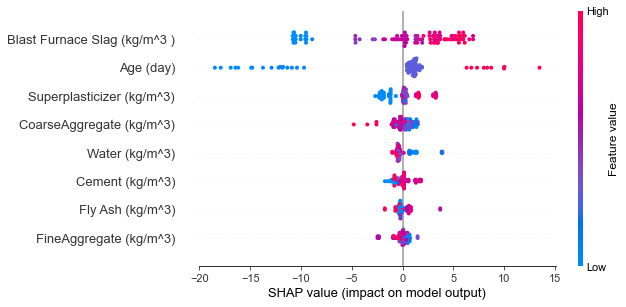

In [13]:
shap.summary_plot(shap_values_smalldata, X_df_smalldata, plot_type = 'bar')
shap.summary_plot(shap_values_smalldata, X_df_smalldata)

Compressive Strength (Prediction): 44.37
Compressive Strength (Ground Truth): 44.7


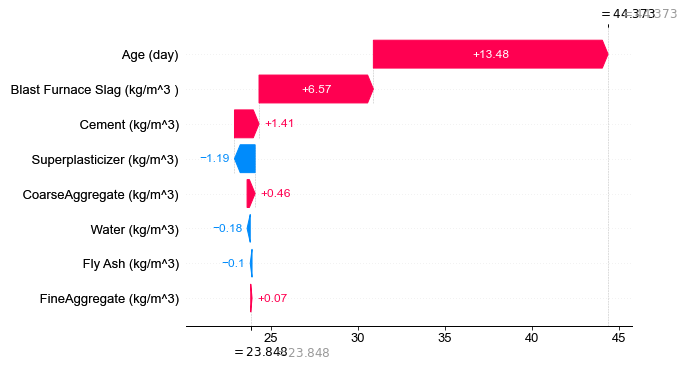

In [14]:
ind = np.argmax(y_hat_smalldata)
print('Compressive Strength (Prediction):', np.round(y_hat_smalldata[ind],2)) 
print('Compressive Strength (Ground Truth):', np.round(y_smalldata[ind],2)) 
shap.initjs()
shap.waterfall_plot(shap_explainer_smalldata.expected_value[0],shap_values_smalldata[ind], X_df_smalldata.iloc[ind], max_display =20, show=True)
shap.force_plot(shap_explainer_smalldata.expected_value,shap_values_smalldata[ind], X_df_smalldata.iloc[ind])
